## Derivations

In [3]:
%pylab inline
import sympy as sp
import daft

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


We will simplify the model first. This is the full model in question

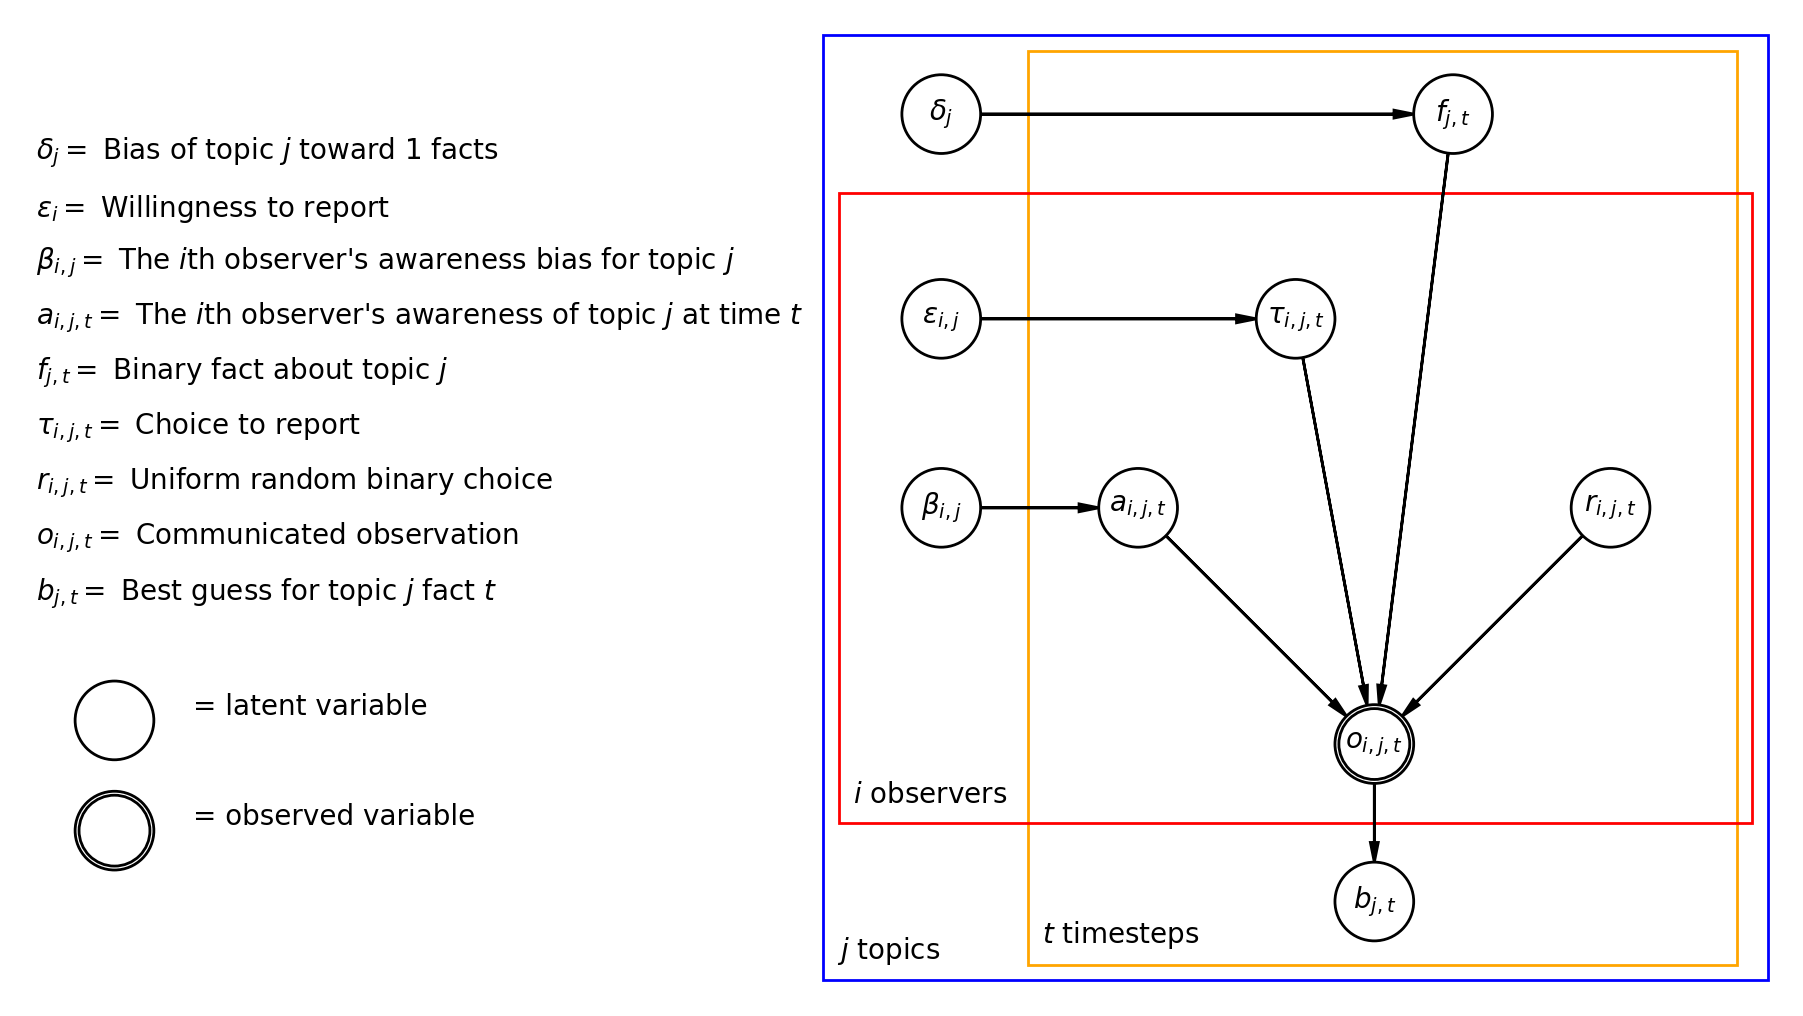

In [13]:
scale = 1.6
pgm = daft.PGM(observed_style="inner")
pgm.add_node("delta", r"$\delta_j$", .75, 2.5)
pgm.add_node("epsilon", r"$\epsilon_{i,j}$", 0.75, 1.2)
pgm.add_node("f", r"$f_{j,t}$", 4, 2.5)
pgm.add_node("tau", r"$\tau_{i,j,t}$", 3, 1.2)
pgm.add_node("beta", r"$\beta_{i,j}$", .75, 0.0)
pgm.add_node("a", r"$a_{i,j,t}$", 2, 0.0)
pgm.add_node("r", r"$r_{i,j,t}$", 5, 0.0)
pgm.add_node("o", r"$o_{i,j,t}$", 3.5, -1.5, observed=True)
pgm.add_node("b", r"$b_{j,t}$", 3.5, -2.5)

pgm.add_edge("delta", "f")
pgm.add_edge("epsilon", "tau")
pgm.add_edge("beta", "a")
pgm.add_edge("a", "o")
pgm.add_edge("f", "o")
pgm.add_edge("tau", "o")
pgm.add_edge("r", "o")
pgm.add_edge("o", "b")

pgm.add_plate([0, -3, 6, 6], rect_params={"ec": "blue"},label=r"$j$ topics")
pgm.add_plate([1.3, -2.9, 4.5, 5.8], rect_params={"ec": "orange"}, label=r"$t$ timesteps")
pgm.add_plate([0.1, -2, 5.8, 4], rect_params={"ec": "red"}, label=r"$i$ observers")

x0 = -4
dx = 0.5
y0 = -1
dy = 0.35

pgm.add_text(x0 - 2*dx, y0 + dy, r"$b_{j,t}=$ Best guess for topic $j$ fact $t$")
pgm.add_text(x0 - 2*dx, y0 + 2*dy, r"$o_{i,j,t}=$ Communicated observation")
pgm.add_text(x0 - 2*dx, y0 + 3*dy, r"$r_{i,j,t}=$ Uniform random binary choice")
pgm.add_text(x0 - 2*dx, y0 + 4*dy, r"$\tau_{i,j,t}=$ Choice to report")
pgm.add_text(x0 - 2*dx, y0 + 5*dy, r"$f_{j,t}=$ Binary fact about topic $j$")
pgm.add_text(x0 - 2*dx, y0 + 6*dy, r"$a_{i,j,t}=$ The $i$th observer's awareness of topic $j$ at time $t$")
pgm.add_text(x0 - 2*dx, y0 + 7*dy, r"$\beta_{i,j}=$ The $i$th observer's awareness bias for topic $j$")
pgm.add_text(x0 - 2*dx, y0 + 8*dy, r"$\epsilon_{i}=$ Willingness to report")
pgm.add_text(x0 - 2*dx, y0 + 9*dy, r"$\delta_{j}=$ Bias of topic $j$ toward $1$ facts")
pgm.add_node("latent", "", x0 - 0.5, y0-dy, 1)
pgm.add_text(x0, y0-dy, "= latent variable")
pgm.add_node("observed", "", x0 - 0.5, y0-3*dy, 1, alternate=True)
pgm.add_text(x0, y0-3*dy, "= observed variable")

pgm.render(200);
pgm.savefig("reporting_network.jpg");

Let's start by thinking about only one topic at a time.

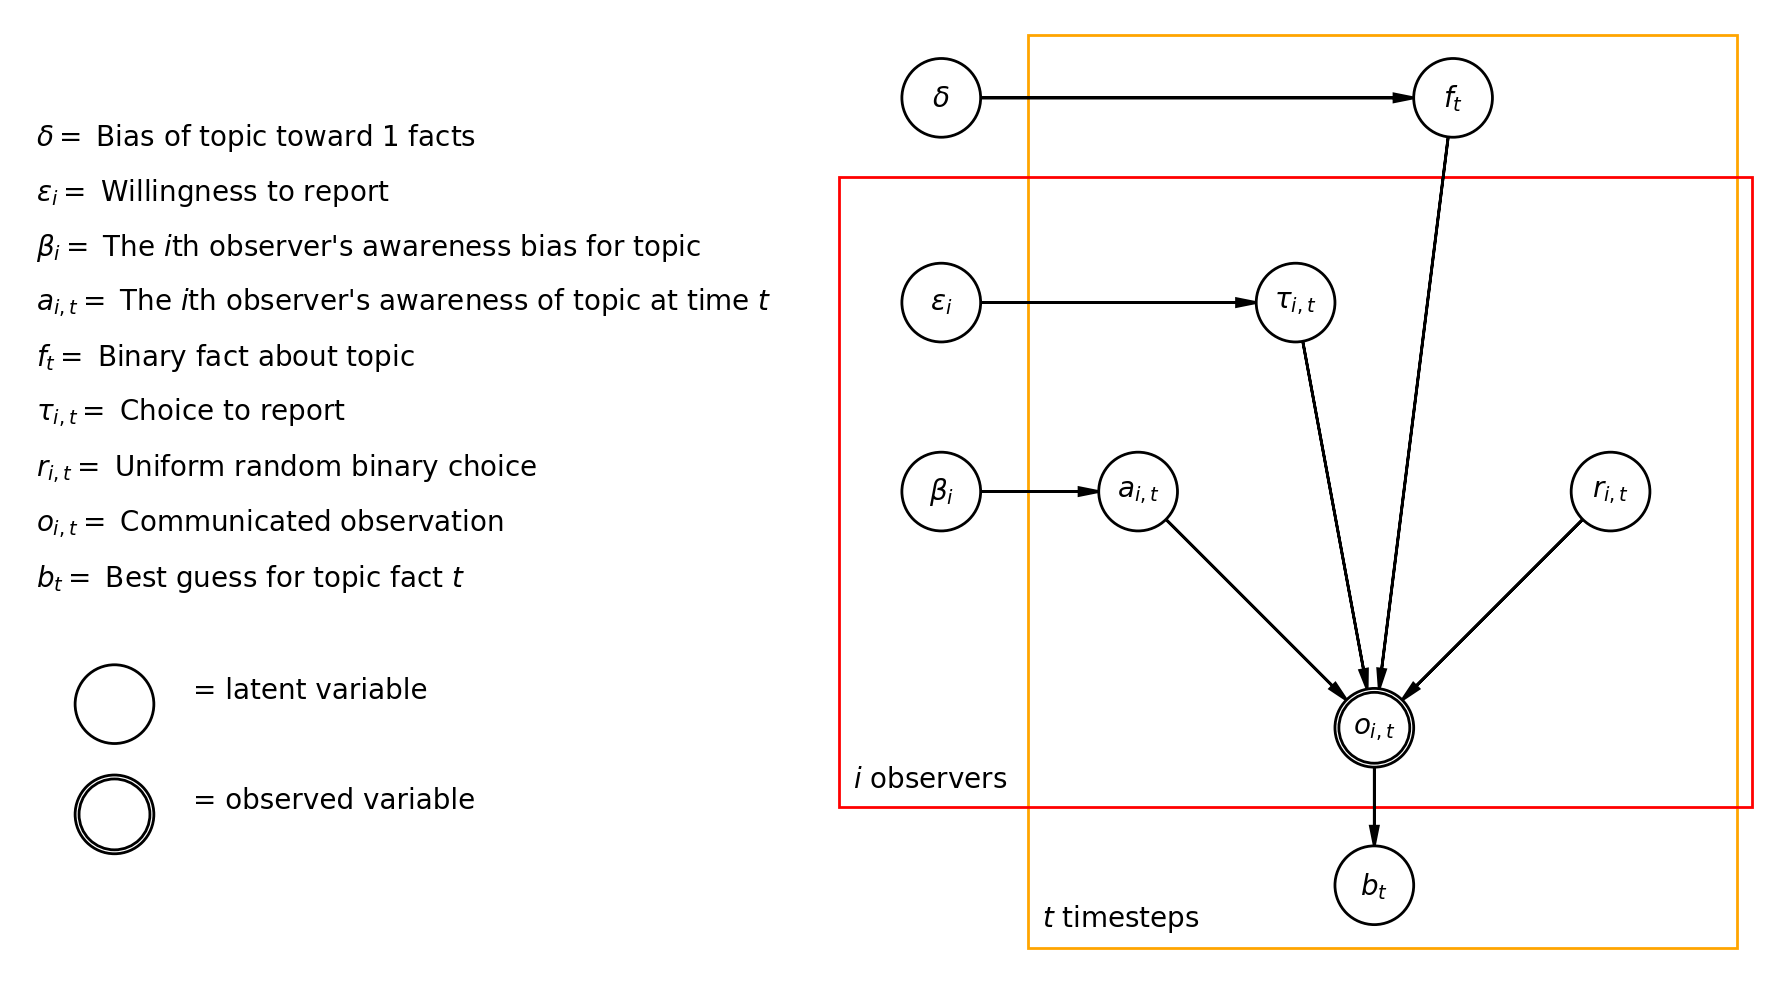

In [14]:
scale = 1.6
pgm = daft.PGM(observed_style="inner")
pgm.add_node("delta", r"$\delta$", .75, 2.5)
pgm.add_node("epsilon", r"$\epsilon_{i}$", 0.75, 1.2)
pgm.add_node("f", r"$f_{t}$", 4, 2.5)
pgm.add_node("tau", r"$\tau_{i,t}$", 3, 1.2)
pgm.add_node("beta", r"$\beta_{i}$", .75, 0.0)
pgm.add_node("a", r"$a_{i,t}$", 2, 0.0)
pgm.add_node("r", r"$r_{i,t}$", 5, 0.0)
pgm.add_node("o", r"$o_{i,t}$", 3.5, -1.5, observed=True)
pgm.add_node("b", r"$b_{t}$", 3.5, -2.5)

pgm.add_edge("delta", "f")
pgm.add_edge("epsilon", "tau")
pgm.add_edge("beta", "a")
pgm.add_edge("a", "o")
pgm.add_edge("f", "o")
pgm.add_edge("tau", "o")
pgm.add_edge("r", "o")
pgm.add_edge("o", "b")

pgm.add_plate([1.3, -2.9, 4.5, 5.8], rect_params={"ec": "orange"}, label=r"$t$ timesteps")
pgm.add_plate([0.1, -2, 5.8, 4], rect_params={"ec": "red"}, label=r"$i$ observers")

x0 = -4
dx = 0.5
y0 = -1
dy = 0.35

pgm.add_text(x0 - 2*dx, y0 + dy, r"$b_{t}=$ Best guess for topic fact $t$")
pgm.add_text(x0 - 2*dx, y0 + 2*dy, r"$o_{i,t}=$ Communicated observation")
pgm.add_text(x0 - 2*dx, y0 + 3*dy, r"$r_{i,t}=$ Uniform random binary choice")
pgm.add_text(x0 - 2*dx, y0 + 4*dy, r"$\tau_{i,t}=$ Choice to report")
pgm.add_text(x0 - 2*dx, y0 + 5*dy, r"$f_{t}=$ Binary fact about topic")
pgm.add_text(x0 - 2*dx, y0 + 6*dy, r"$a_{i,t}=$ The $i$th observer's awareness of topic at time $t$")
pgm.add_text(x0 - 2*dx, y0 + 7*dy, r"$\beta_{i}=$ The $i$th observer's awareness bias for topic")
pgm.add_text(x0 - 2*dx, y0 + 8*dy, r"$\epsilon_{i}=$ Willingness to report")
pgm.add_text(x0 - 2*dx, y0 + 9*dy, r"$\delta=$ Bias of topic toward $1$ facts")
pgm.add_node("latent", "", x0 - 0.5, y0-dy, 1)
pgm.add_text(x0, y0-dy, "= latent variable")
pgm.add_node("observed", "", x0 - 0.5, y0-3*dy, 1, alternate=True)
pgm.add_text(x0, y0-3*dy, "= observed variable")

pgm.render(200);
pgm.savefig("reporting_network.jpg");

Now we'll think about only one observer for the moment.

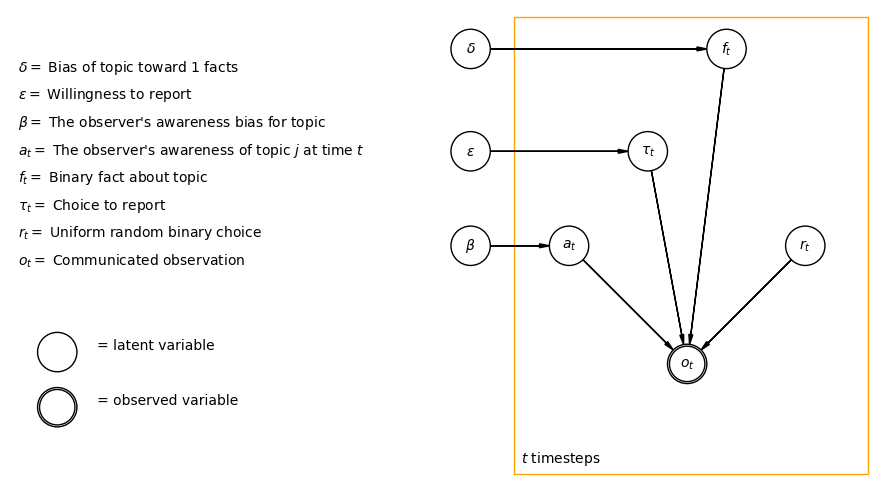

In [18]:
scale = 1.6
pgm = daft.PGM(observed_style="inner")
pgm.add_node("delta", r"$\delta$", .75, 2.5)
pgm.add_node("epsilon", r"$\epsilon$", 0.75, 1.2)
pgm.add_node("f", r"$f_{t}$", 4, 2.5)
pgm.add_node("tau", r"$\tau_{t}$", 3, 1.2)
pgm.add_node("beta", r"$\beta$", .75, 0.0)
pgm.add_node("a", r"$a_{t}$", 2, 0.0)
pgm.add_node("r", r"$r_{t}$", 5, 0.0)
pgm.add_node("o", r"$o_{t}$", 3.5, -1.5, observed=True)

pgm.add_edge("delta", "f")
pgm.add_edge("epsilon", "tau")
pgm.add_edge("beta", "a")
pgm.add_edge("a", "o")
pgm.add_edge("f", "o")
pgm.add_edge("tau", "o")
pgm.add_edge("r", "o")

pgm.add_plate([1.3, -2.9, 4.5, 5.8], rect_params={"ec": "orange"}, label=r"$t$ timesteps")

x0 = -4
dx = 0.5
y0 = -1
dy = 0.35

pgm.add_text(x0 - 2*dx, y0 + 2*dy, r"$o_{t}=$ Communicated observation")
pgm.add_text(x0 - 2*dx, y0 + 3*dy, r"$r_{t}=$ Uniform random binary choice")
pgm.add_text(x0 - 2*dx, y0 + 4*dy, r"$\tau_{t}=$ Choice to report")
pgm.add_text(x0 - 2*dx, y0 + 5*dy, r"$f_{t}=$ Binary fact about topic")
pgm.add_text(x0 - 2*dx, y0 + 6*dy, r"$a_{t}=$ The observer's awareness of topic $j$ at time $t$")
pgm.add_text(x0 - 2*dx, y0 + 7*dy, r"$\beta=$ The observer's awareness bias for topic")
pgm.add_text(x0 - 2*dx, y0 + 8*dy, r"$\epsilon=$ Willingness to report")
pgm.add_text(x0 - 2*dx, y0 + 9*dy, r"$\delta=$ Bias of topic toward $1$ facts")
pgm.add_node("latent", "", x0 - 0.5, y0-dy, 1)
pgm.add_text(x0, y0-dy, "= latent variable")
pgm.add_node("observed", "", x0 - 0.5, y0-3*dy, 1, alternate=True)
pgm.add_text(x0, y0-3*dy, "= observed variable")

pgm.render(dpi=100);
pgm.savefig("reporting_network.jpg");

Under these circumstances, we can throw away the "no report" data and keep only the binary responses.

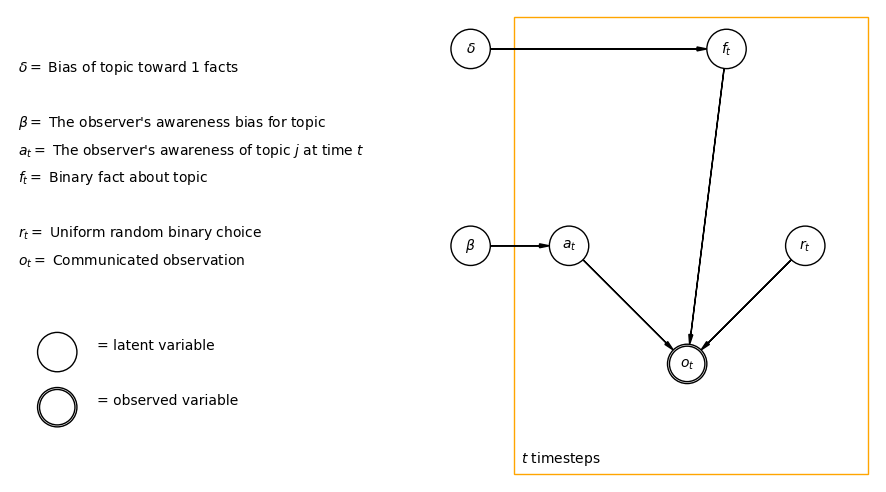

In [19]:
scale = 1.6
pgm = daft.PGM(observed_style="inner")
pgm.add_node("delta", r"$\delta$", .75, 2.5)
pgm.add_node("f", r"$f_{t}$", 4, 2.5)
pgm.add_node("beta", r"$\beta$", .75, 0.0)
pgm.add_node("a", r"$a_{t}$", 2, 0.0)
pgm.add_node("r", r"$r_{t}$", 5, 0.0)
pgm.add_node("o", r"$o_{t}$", 3.5, -1.5, observed=True)

pgm.add_edge("delta", "f")
pgm.add_edge("beta", "a")
pgm.add_edge("a", "o")
pgm.add_edge("f", "o")
pgm.add_edge("r", "o")

pgm.add_plate([1.3, -2.9, 4.5, 5.8], rect_params={"ec": "orange"}, label=r"$t$ timesteps")

x0 = -4
dx = 0.5
y0 = -1
dy = 0.35

pgm.add_text(x0 - 2*dx, y0 + 2*dy, r"$o_{t}=$ Communicated observation")
pgm.add_text(x0 - 2*dx, y0 + 3*dy, r"$r_{t}=$ Uniform random binary choice")
pgm.add_text(x0 - 2*dx, y0 + 5*dy, r"$f_{t}=$ Binary fact about topic")
pgm.add_text(x0 - 2*dx, y0 + 6*dy, r"$a_{t}=$ The observer's awareness of topic $j$ at time $t$")
pgm.add_text(x0 - 2*dx, y0 + 7*dy, r"$\beta=$ The observer's awareness bias for topic")
pgm.add_text(x0 - 2*dx, y0 + 9*dy, r"$\delta=$ Bias of topic toward $1$ facts")
pgm.add_node("latent", "", x0 - 0.5, y0-dy, 1)
pgm.add_text(x0, y0-dy, "= latent variable")
pgm.add_node("observed", "", x0 - 0.5, y0-3*dy, 1, alternate=True)
pgm.add_text(x0, y0-3*dy, "= observed variable")

pgm.render(dpi=100);
pgm.savefig("reporting_network.jpg");